In [1]:
!pip install ultralytics
!pip install roboflow
!pip install -U ipywidgets
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 20.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependen

In [2]:
from roboflow import Roboflow
from ultralytics import RTDETR
import yaml
import cv2
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings("ignore")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
rf = Roboflow(api_key="LOe9sWJ4WskO7PBuo6CK")
project = rf.workspace("monash-ventz").project("beach-waste-vqths")
version = project.version(2)
dataset = version.download("yolov11")            

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Beach-Waste-2 in yolov11:: 100%|██████████| 7044/7044 [00:01<00:00, 6952.98it/s]


In [4]:
def read_yaml(file_name):
  with open(file_name, 'r') as file:
    data = yaml.safe_load(file)
  return data

def create_model():
  model = RTDETR("rtdetr-x.pt")
  return model, model.info()

def write_yaml(file_name, data):
  with open(file_name, 'w') as file:
    yaml.safe_dump(data, file)

def replace_word(data, old_word, new_word):
  if isinstance(data, dict):
    for key, value in data.items():
      if isinstance(value, (dict, list)):
        replace_word(value, old_word, new_word)
      elif isinstance(value, str):
        data[key] = value.replace(old_word, new_word)
  elif isinstance(data, list):
    for item in data:
      if isinstance(item, (dict, list)):
        replace_word(item, old_word, new_word)
      elif isinstance(item, str):
        data[data.index(item)] = item.replace(old_word, new_word)

model, info = create_model()
data_name = dataset.location + '/data.yaml'
data = read_yaml(data_name)

replace_word(data, '../train/images', 'train/images')
replace_word(data, '../valid/images', 'valid/images')
replace_word(data, '../test/images', 'test/images')

write_yaml(data_name, data)
info

100%|██████████| 129M/129M [00:00<00:00, 202MB/s] 


rt-detr-x summary: 867 layers, 67,467,852 parameters, 0 gradients, 232.7 GFLOPs


(867, 67467852, 0, 232.684544)

In [5]:
model.train(data=data_name, epochs=20, imgsz=640, batch=12)

Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-x.pt, data=/kaggle/working/Beach-Waste-2/data.yaml, epochs=20, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]


Overriding model.yaml nc=80 with nc=7
WARNING ⚠️ no model scale passed. Assuming scale='x'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25792  ultralytics.nn.modules.block.HGStem          [3, 32, 64]                   
  1                  -1  6    259200  ultralytics.nn.modules.block.HGBlock         [64, 64, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6   1248256  ultralytics.nn.modules.block.HGBlock         [128, 128, 512, 3, 6]         
  4                  -1  6   1788928  ultralytics.nn.modules.block.HGBlock         [512, 128, 512, 3, 6, False, True]
  5                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  6                  -1  6   2079232  ultralytics.nn.modules.block.HGBlock         [512, 256, 1024, 5, 6,

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.7MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Beach-Waste-2/train/labels... 2675 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2675/2675 [00:02<00:00, 1155.27it/s]


train: New cache created: /kaggle/working/Beach-Waste-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Beach-Waste-2/valid/labels... 561 images, 0 backgrounds, 0 corrupt: 100%|██████████| 561/561 [00:00<00:00, 1172.90it/s]


val: New cache created: /kaggle/working/Beach-Waste-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 193 weight(decay=0.0), 256 weight(decay=0.00046875), 276 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       1/20      14.4G     0.9369      3.144      0.323        103        640: 100%|██████████| 223/223 [05:47<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:21<00:00,  1.12it/s]

                   all        561       2558      0.644      0.529      0.514      0.361



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       2/20      14.5G     0.5911      0.767     0.1473         89        640: 100%|██████████| 223/223 [05:42<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.692      0.613      0.636      0.449



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       3/20      14.4G     0.5683     0.7443     0.1363         67        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.711      0.627      0.653      0.473



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       4/20      14.3G     0.5556     0.7321     0.1347        107        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.688      0.595      0.607      0.443



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       5/20      14.5G     0.5499     0.7321     0.1318         70        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.733       0.66      0.698      0.509



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       6/20      14.1G     0.5302     0.6942     0.1262         76        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.757      0.655      0.703      0.502



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       7/20      14.2G     0.5255     0.6938     0.1216         62        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.797      0.651      0.729      0.535



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       8/20      14.3G      0.523     0.6845     0.1211         80        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.809      0.693      0.759      0.554



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       9/20      13.9G     0.5032     0.6715     0.1119         72        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558       0.79      0.699      0.753      0.559



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      10/20      13.9G     0.5033      0.666     0.1143        138        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558      0.762      0.695      0.725      0.527


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      11/20      13.9G     0.4642      0.669     0.1105         58        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558        nan      0.902      0.759      0.558



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      12/20      13.9G     0.4546      0.649     0.1088         46        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558      0.808      0.706      0.757      0.553



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      13/20      14.3G     0.4494     0.6328     0.1087         47        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.836       0.73      0.788      0.582



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      14/20      13.8G     0.4448      0.616     0.1044        112        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558      0.787      0.745      0.788      0.584



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      15/20      13.9G      0.441     0.6111     0.1022         85        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558      0.803      0.748      0.797      0.592



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      16/20      13.9G     0.4284     0.5872    0.09936         96        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558      0.825      0.749        0.8      0.596



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      17/20      13.9G     0.4181     0.5724    0.09612         69        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558      0.854      0.736      0.804      0.601



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      18/20      14.4G     0.4155     0.5721    0.09518         77        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.831      0.734       0.79      0.595



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      19/20      13.9G     0.4119     0.5545    0.09422         64        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

                   all        561       2558      0.809      0.762      0.804      0.601



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      20/20      14.5G     0.4036     0.5435    0.09108         45        640: 100%|██████████| 223/223 [05:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]

                   all        561       2558      0.869      0.743      0.816      0.611



20 epochs completed in 2.026 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 135.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 135.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
rt-detr-x summary: 646 layers, 65,481,821 parameters, 0 gradients, 222.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]


                   all        561       2558      0.867      0.742      0.815       0.61
                Bottle        366        874      0.906      0.826      0.872      0.642
                 Metal        228        458      0.923      0.832      0.882      0.657
               Plastic        331        603      0.844      0.776      0.811      0.634
                  Rope        155        205        0.8      0.478       0.64      0.412
             Styrofoam        195        418      0.861      0.799      0.869      0.704
Speed: 0.1ms preprocess, 31.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b402eb6a410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [6]:
# Validate the model
metrics = model.val() 
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
rt-detr-x summary: 646 layers, 65,481,821 parameters, 0 gradients, 222.5 GFLOPs


val: Scanning /kaggle/working/Beach-Waste-2/valid/labels.cache... 561 images, 0 backgrounds, 0 corrupt: 100%|██████████| 561/561 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:21<00:00,  2.15it/s]


                   all        561       2558      0.868      0.743      0.816      0.612
                Bottle        366        874      0.908      0.827      0.871      0.645
                 Metal        228        458      0.925      0.832      0.882      0.658
               Plastic        331        603      0.847      0.774      0.813      0.637
                  Rope        155        205      0.796      0.478       0.64      0.413
             Styrofoam        195        418      0.863      0.801      0.871      0.705
Speed: 0.2ms preprocess, 34.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train2


array([    0.64458,     0.61168,     0.65817,     0.63745,     0.41296,     0.70525,     0.61168])

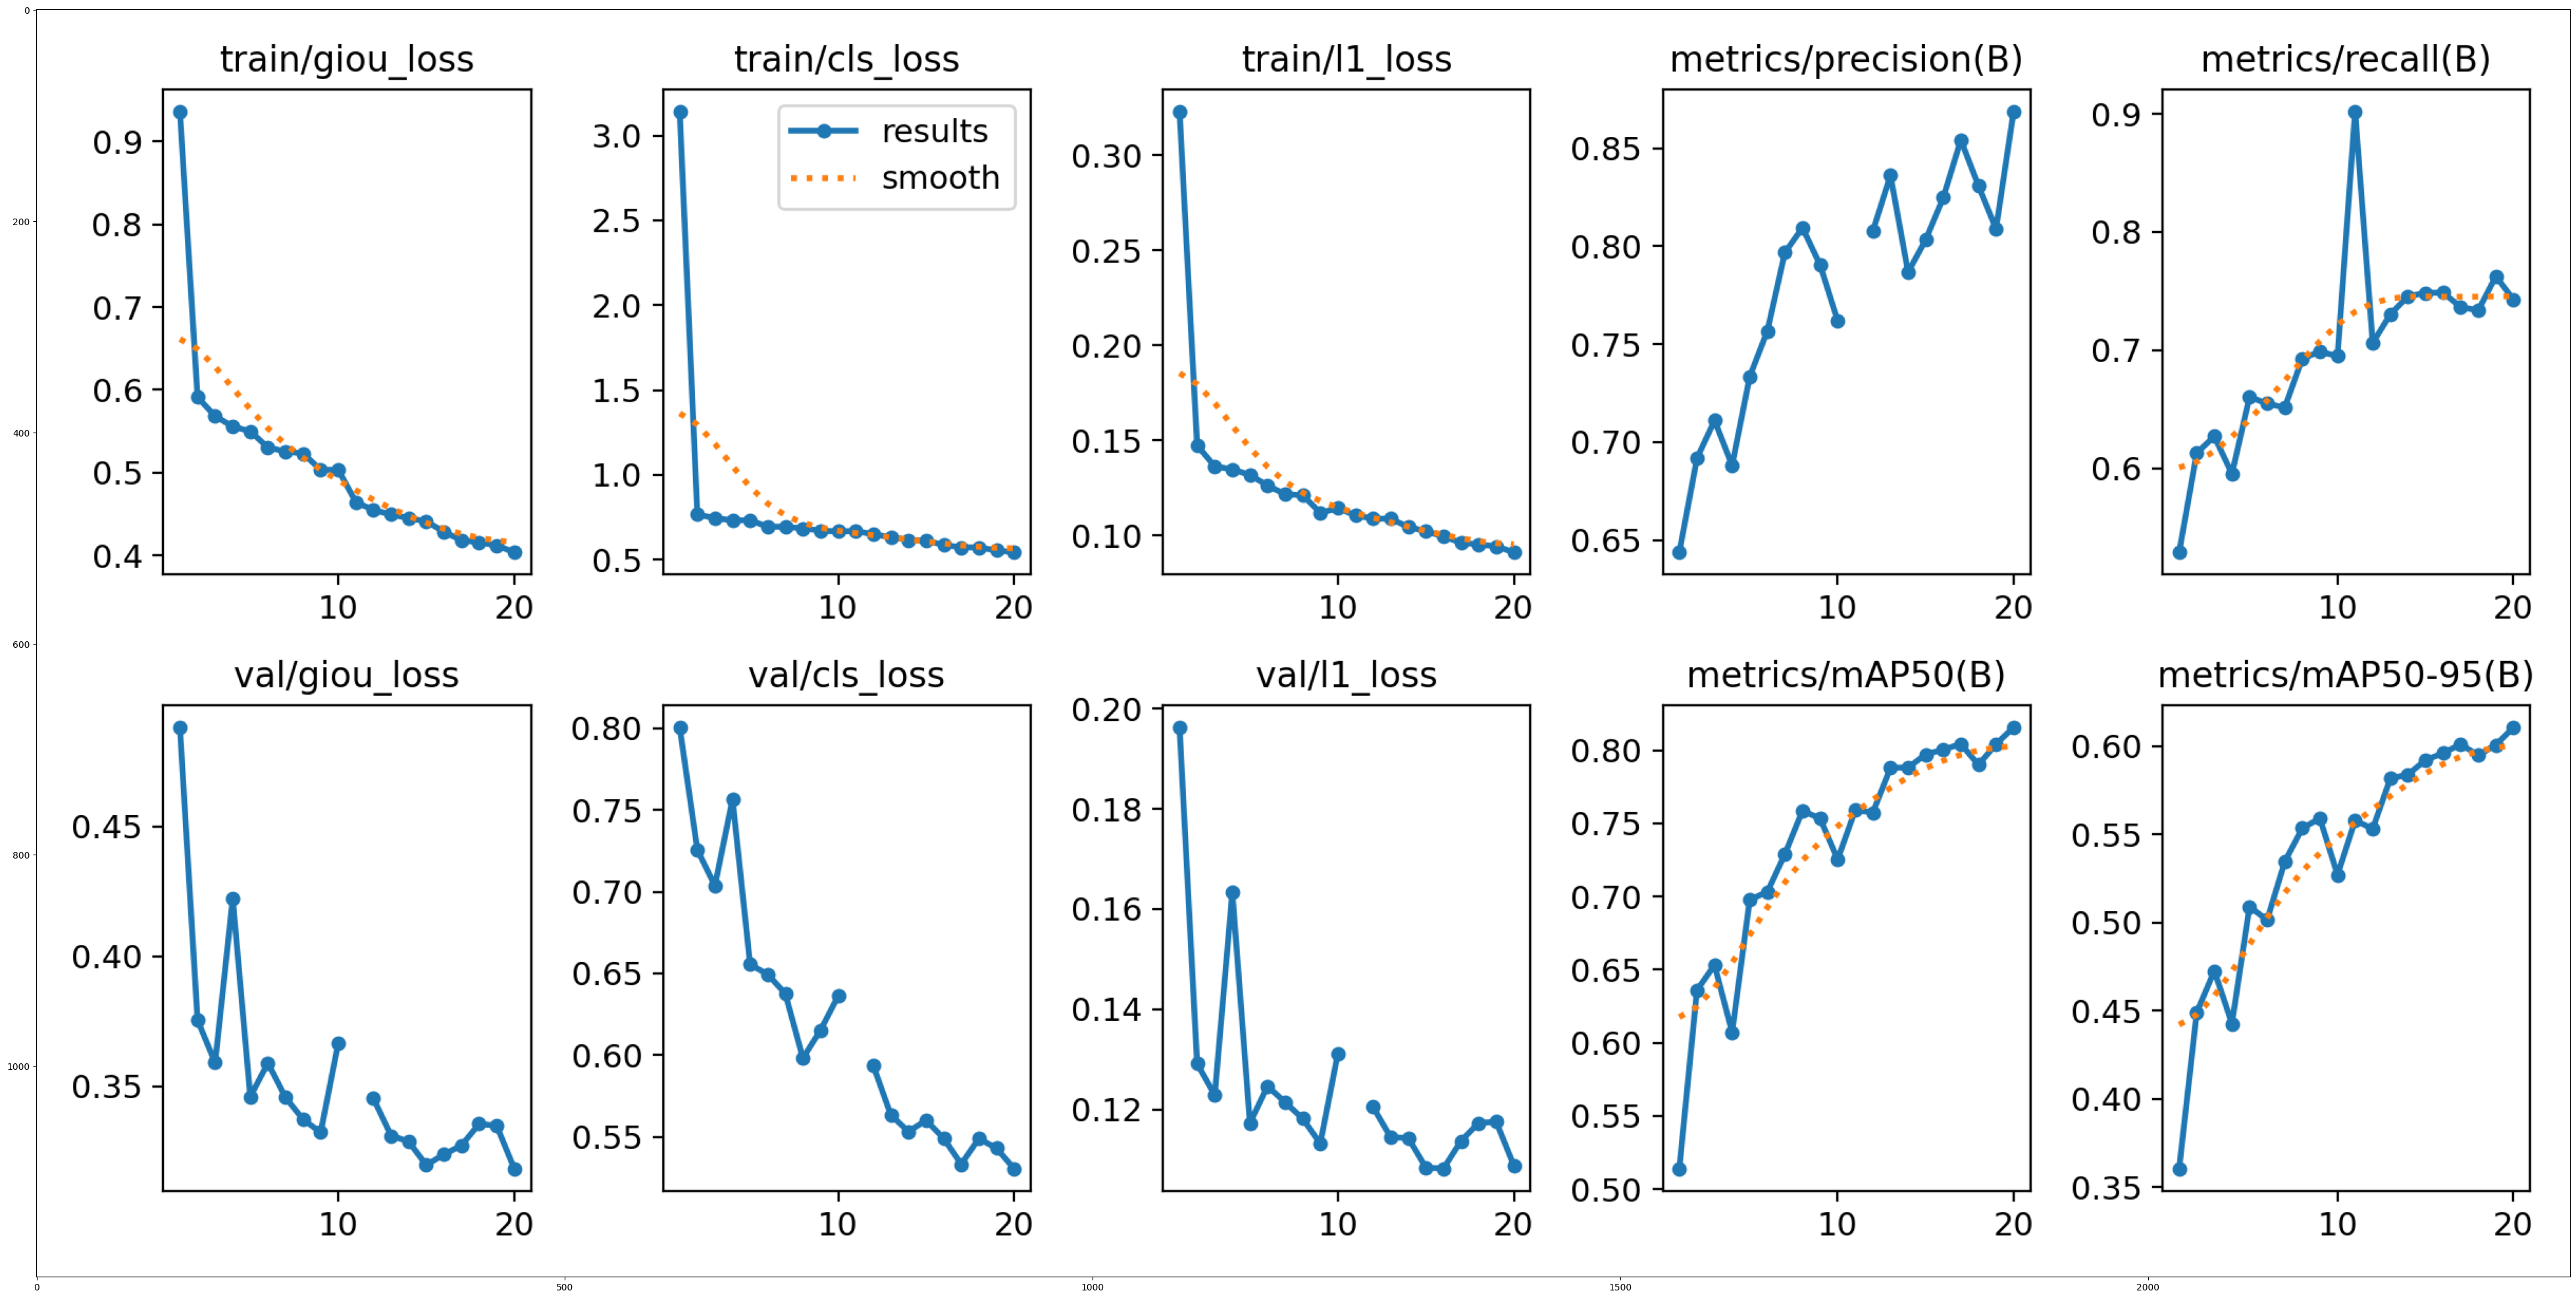

In [7]:
result_plot = plt.imread("/kaggle/working/runs/detect/train/results.png")
plt.figure(figsize=(50, 25))
plt.imshow(result_plot)
plt.show()

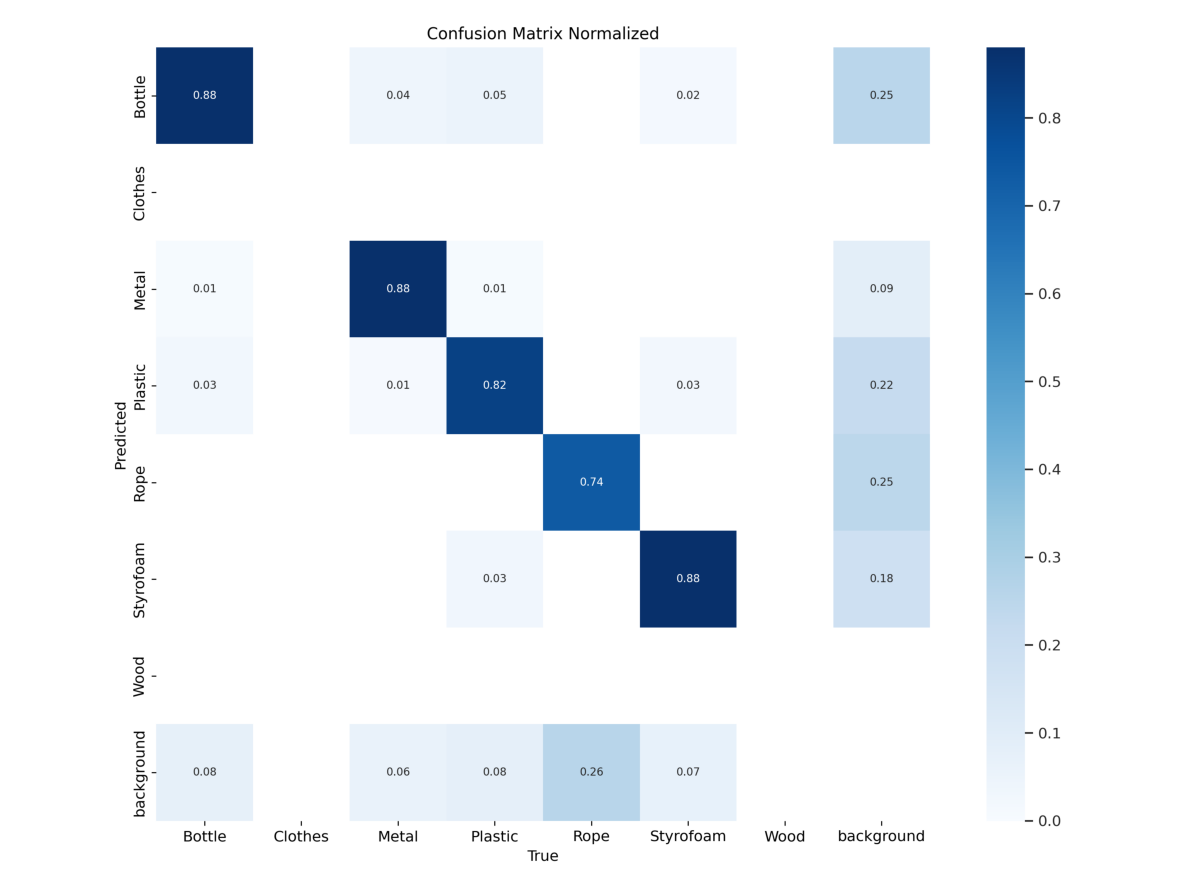

In [8]:
cm_n = plt.imread("/kaggle/working/runs/detect/train/confusion_matrix_normalized.png")
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(cm_n)

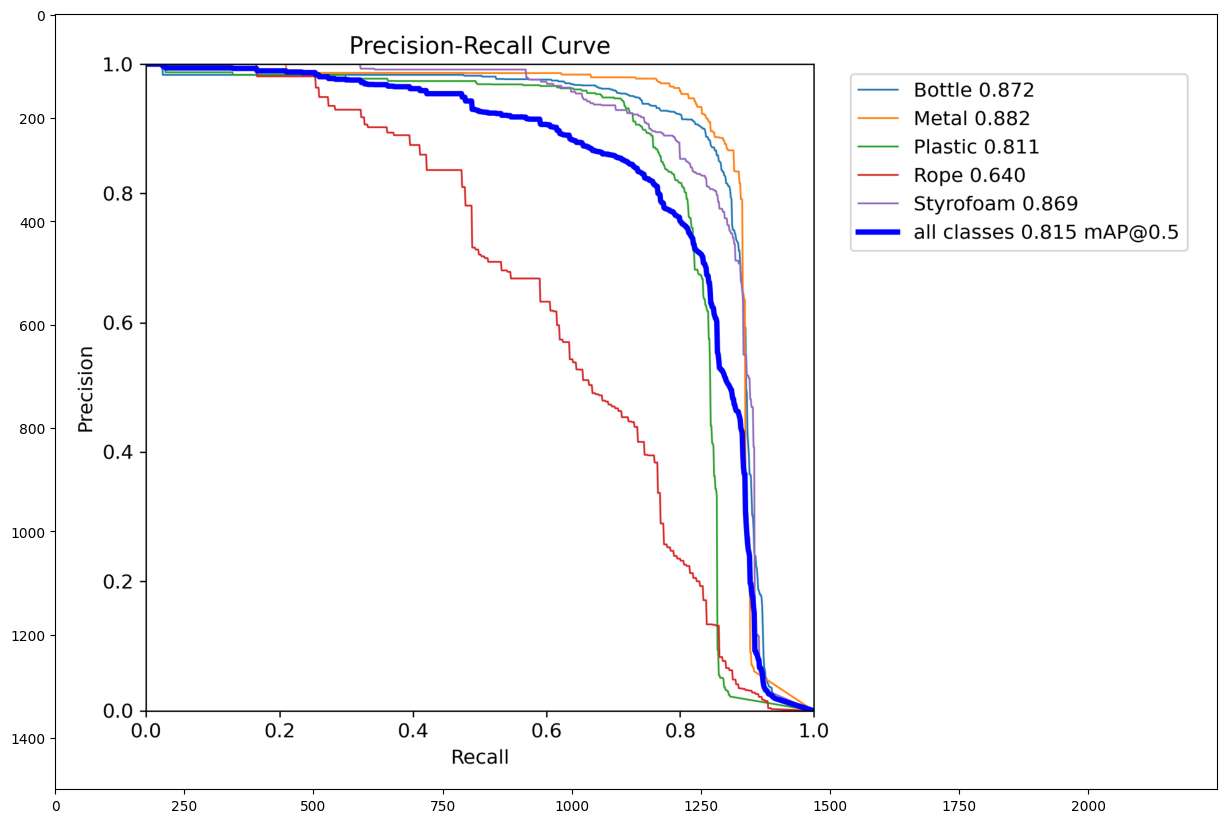

In [9]:
result = plt.imread("/kaggle/working/runs/detect/train/PR_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

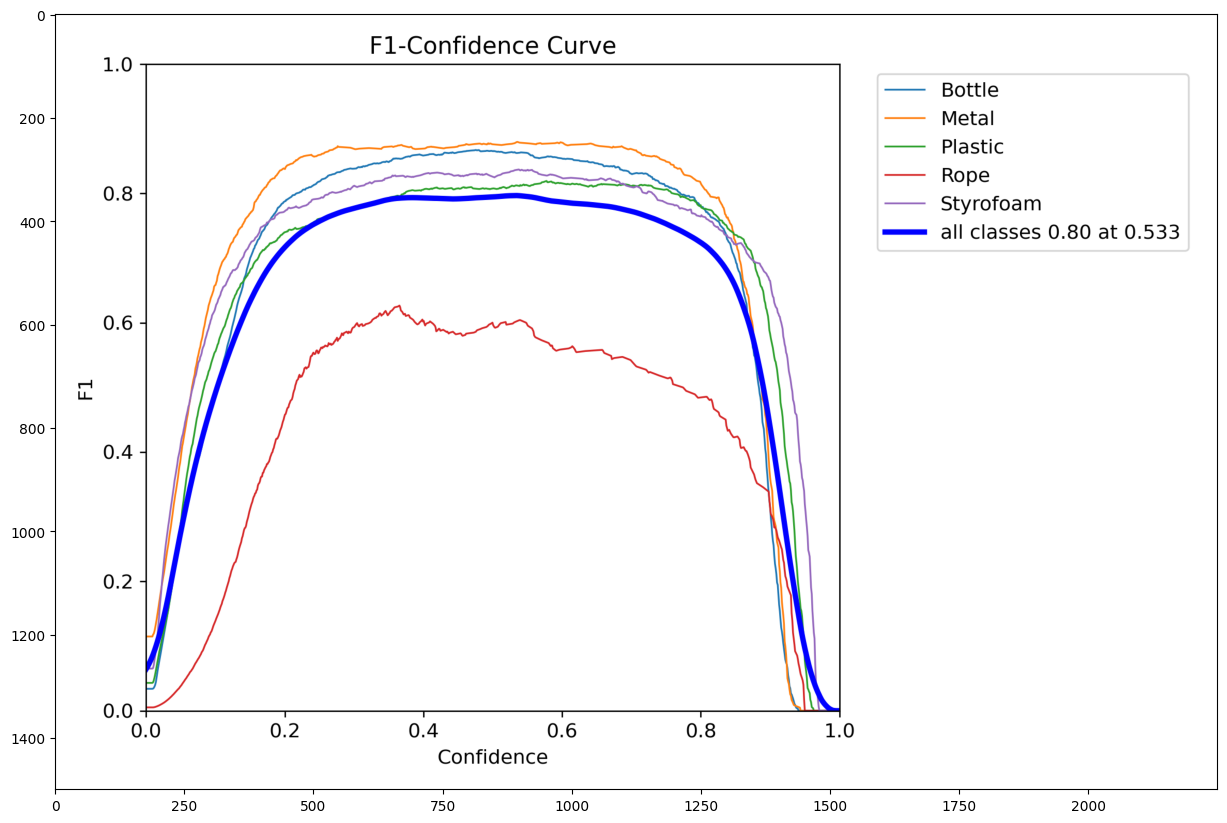

In [10]:
result = plt.imread("/kaggle/working/runs/detect/train/F1_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

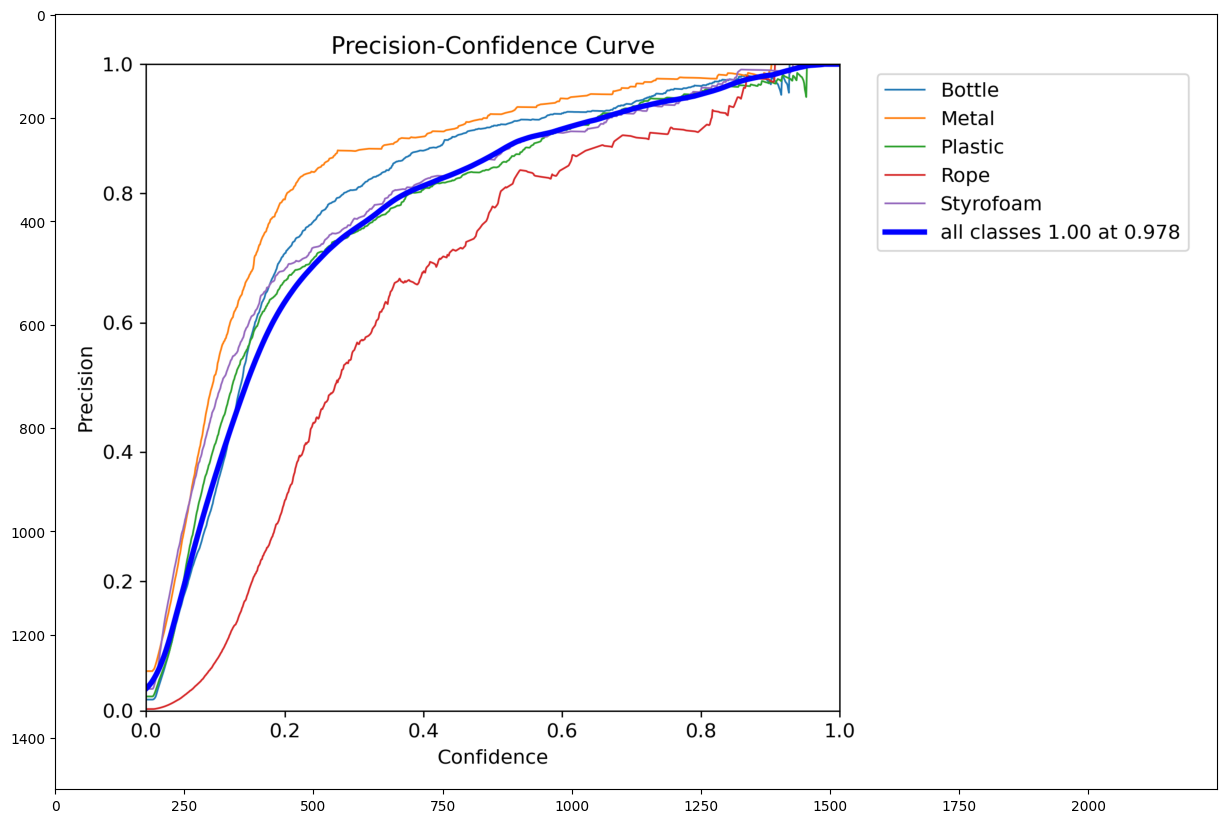

In [11]:
result = plt.imread("/kaggle/working/runs/detect/train/P_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

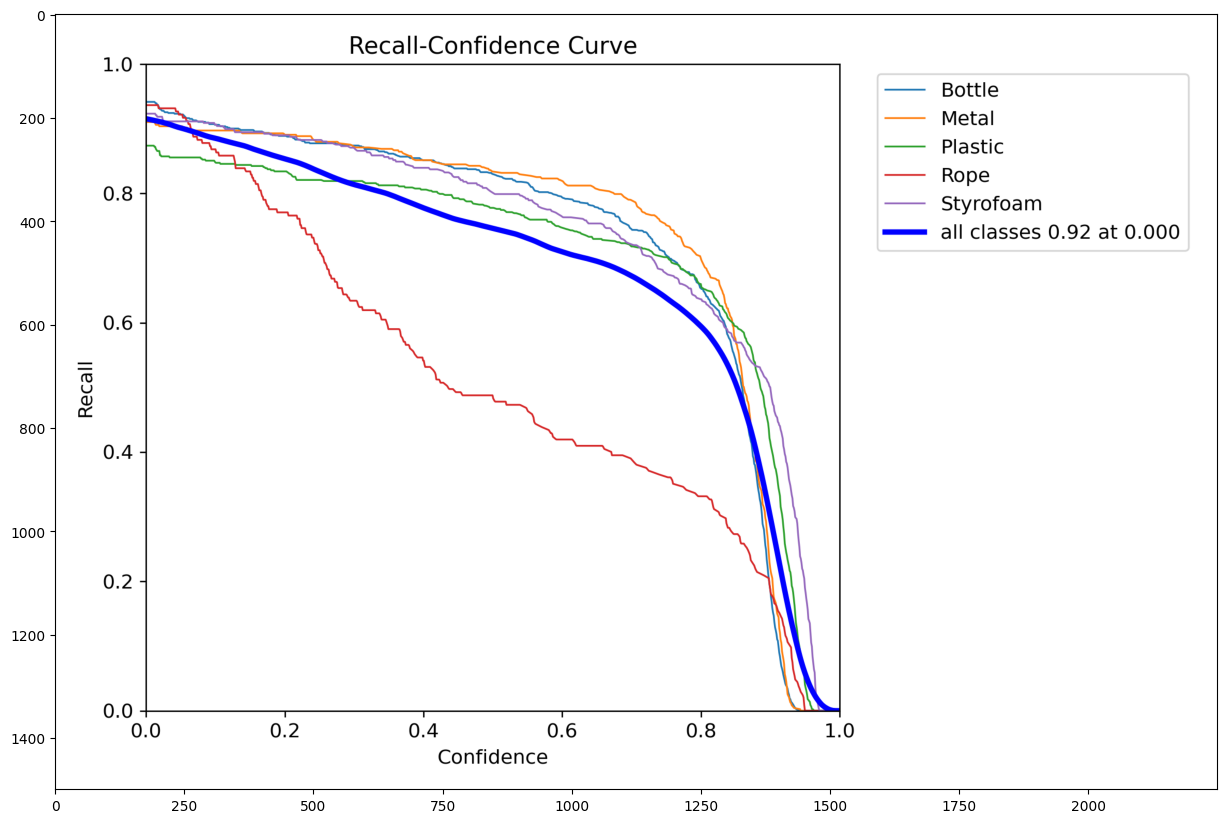

In [12]:
result = plt.imread("/kaggle/working/runs/detect/train/R_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

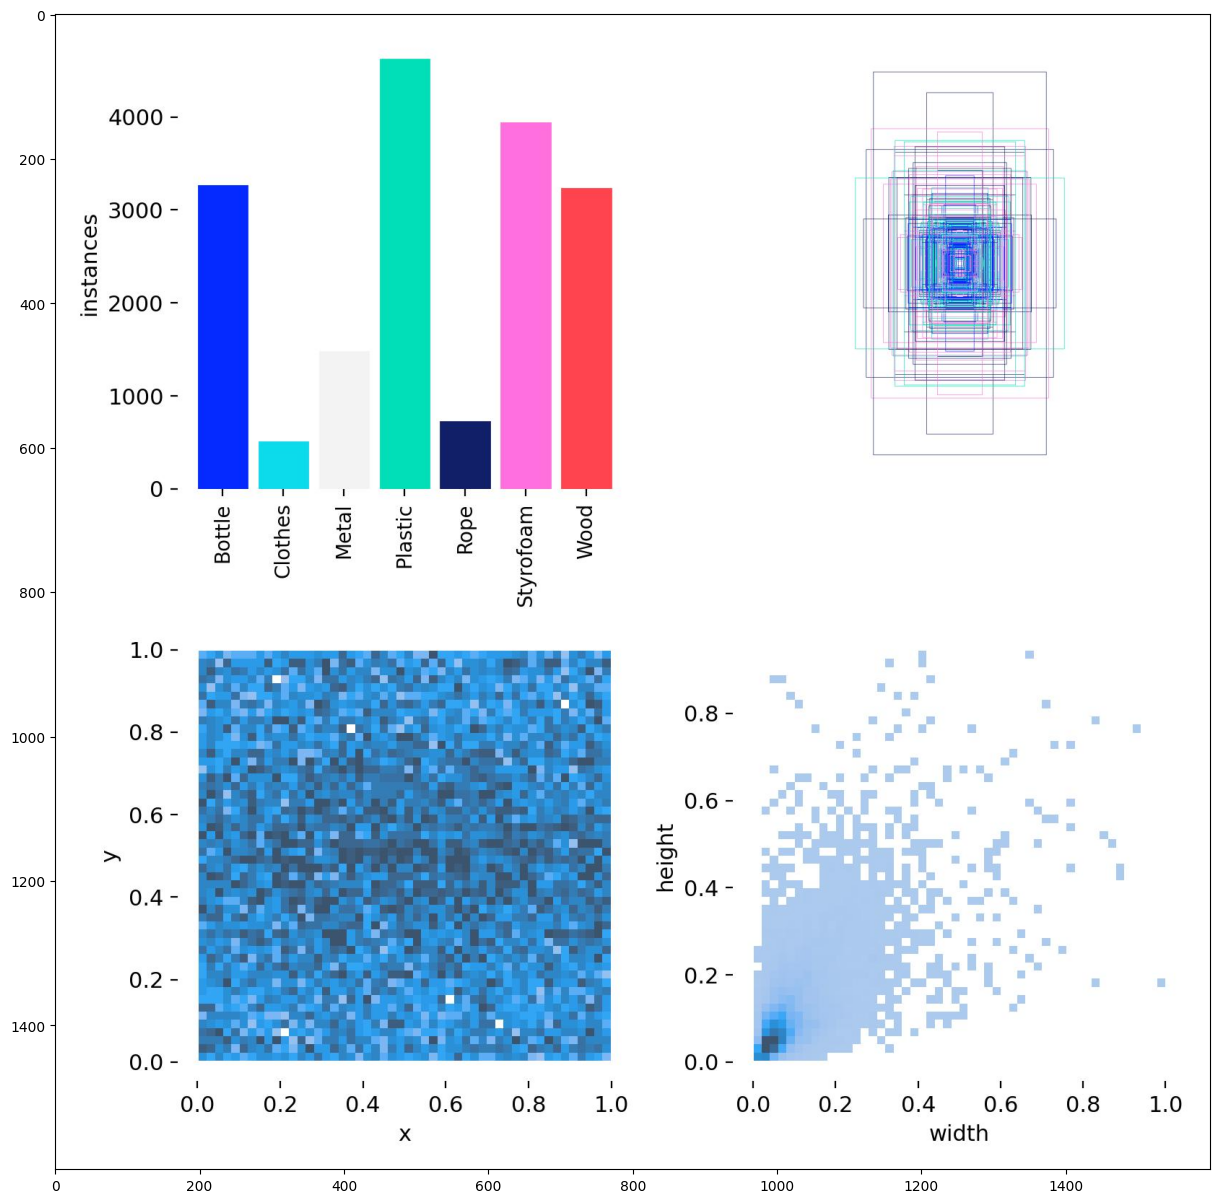

In [13]:
result = plt.imread("/kaggle/working/runs/detect/train/labels.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

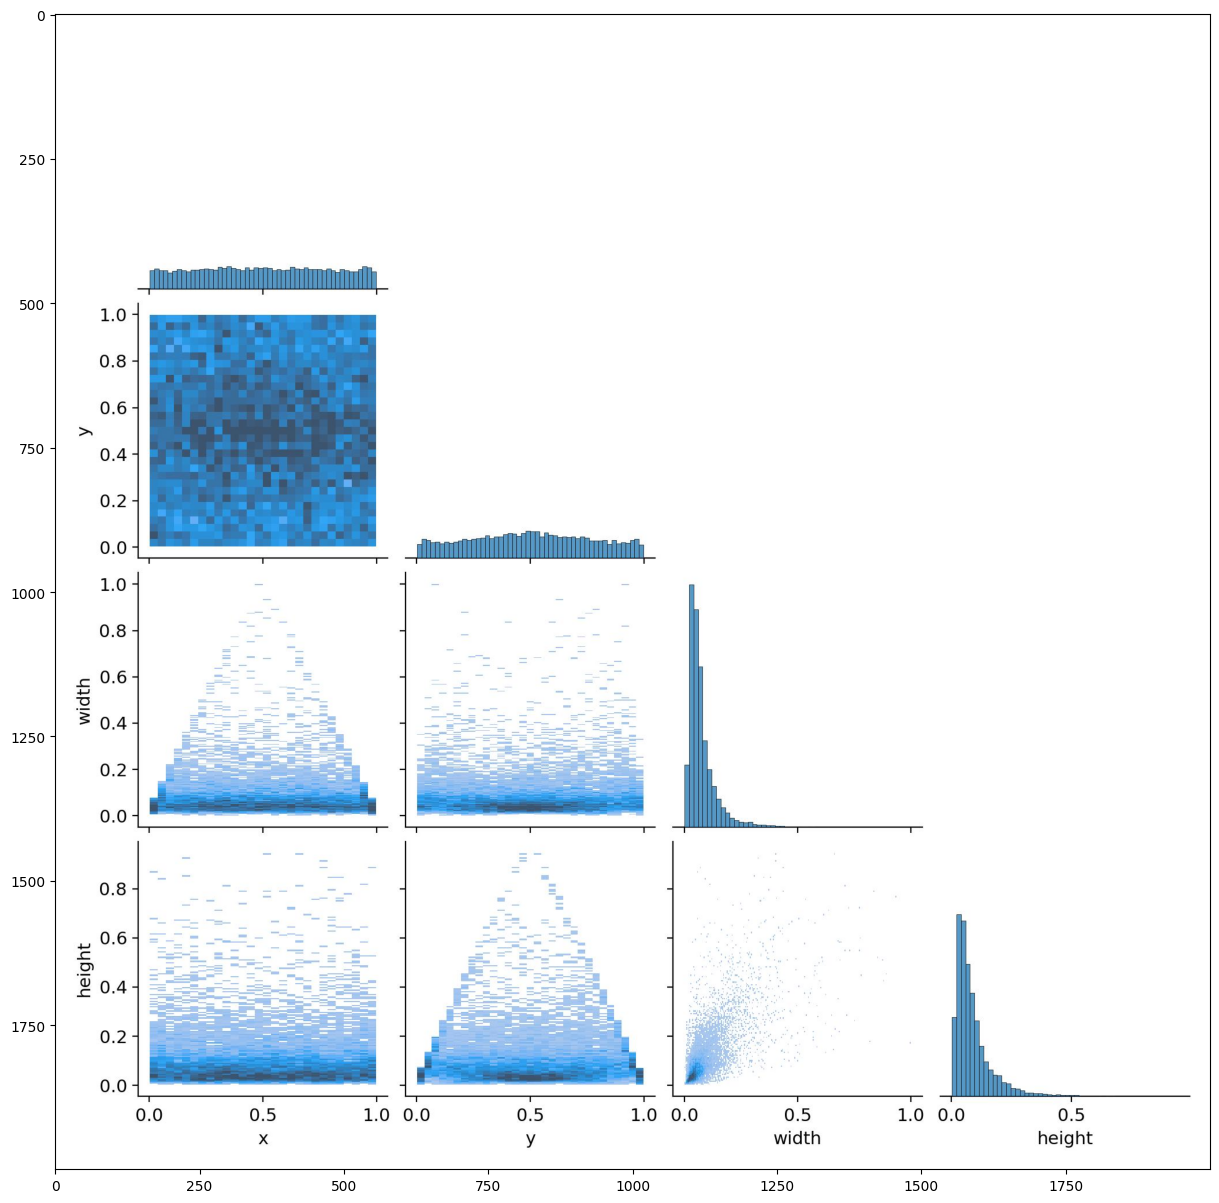

In [14]:
result = plt.imread("/kaggle/working/runs/detect/train/labels_correlogram.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

In [15]:
def prediksi(image, model, label=True, boxs=True):
    results = model.predict(image, batch=1)
    object_detected = False 
    
    for result in results:
        boxes = result.boxes.cpu().numpy()
        if len(boxes) == 0:
            continue 
        
        object_detected = True  
        for box in boxes:
            r = box.xyxy[0].astype(int)
            if boxs:
                print(r)
            cv2.rectangle(image, r[:2], r[2:], (0, 255, 0), 2)
            if label:
                cls = result.names[int(box.cls[0])]
                cv2.putText(image, str(cls), (r[0] + 5, r[1] + 20), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 2)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off") 
    plt.show()
    if not object_detected:
        print("bersih")

In [16]:
url = "https://www.kimointernational.org/wp/wp-content/uploads/2017/01/P1060092-840x630.jpg"
response = requests.get(url)

with open("downloaded_image.jpg", "wb") as file:
    file.write(response.content)

print("File berhasil diunduh.")

File berhasil diunduh.



0: 640x640 1 Bottle, 5 Plastics, 6 Styrofoams, 57.4ms
Speed: 2.8ms preprocess, 57.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


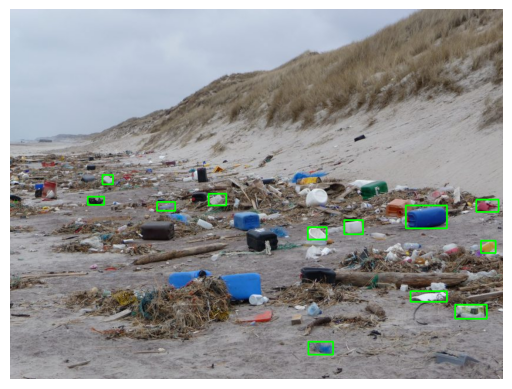

In [17]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=False, boxs=False)


0: 640x640 1 Bottle, 5 Plastics, 6 Styrofoams, 54.7ms
Speed: 2.7ms preprocess, 54.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


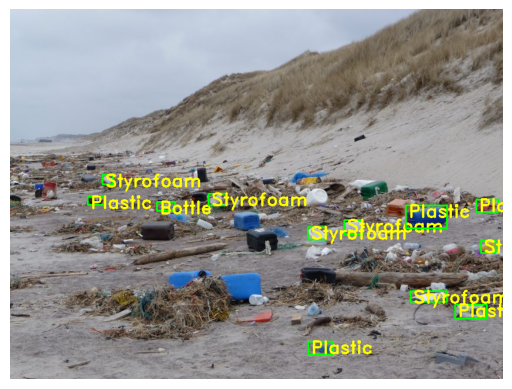

In [18]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False)

In [19]:
url = "https://www.plasticfreeseas.org/wp-content/uploads/2020/12/Bad-picture-5.png"
response = requests.get(url)

with open("downloaded_image.jpg", "wb") as file:
    file.write(response.content)

print("File berhasil diunduh.")

File berhasil diunduh.



0: 640x640 12 Plastics, 1 Wood, 54.7ms
Speed: 2.6ms preprocess, 54.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


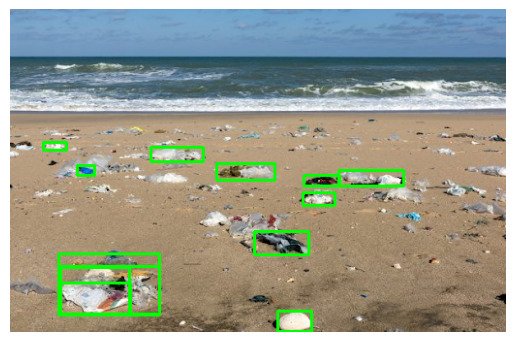

In [20]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=False, boxs=False)


0: 640x640 12 Plastics, 1 Wood, 54.8ms
Speed: 3.3ms preprocess, 54.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


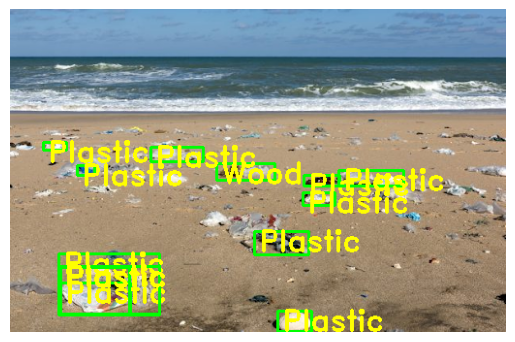

In [21]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False)

In [22]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3xQXWwvAood6vCChE67bb41d7e_JkzNHtnA&s"
response = requests.get(url)

with open("downloaded_image.jpg", "wb") as file:
    file.write(response.content)

print("File berhasil diunduh.")

File berhasil diunduh.



0: 640x640 1 Bottle, 2 Plastics, 1 Styrofoam, 54.6ms
Speed: 2.0ms preprocess, 54.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


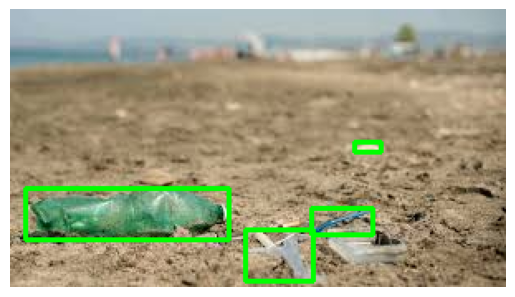

In [23]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=False, boxs=False)


0: 640x640 1 Bottle, 2 Plastics, 1 Styrofoam, 54.6ms
Speed: 2.3ms preprocess, 54.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


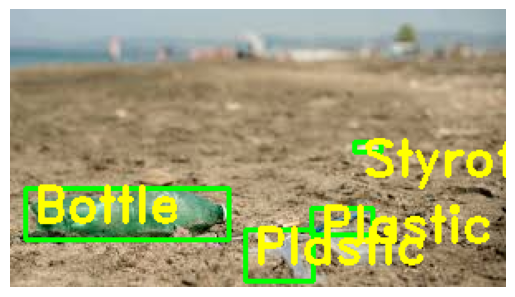

In [24]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False)

In [25]:
url = "https://cdn.idntimes.com/content-images/post/20151112/tominibay-e4c6aab964fffded0bba8e147e34a048.jpg"
response = requests.get(url)

with open("downloaded_image.jpg", "wb") as file:
    file.write(response.content)

print("File berhasil diunduh.")

File berhasil diunduh.



0: 640x640 (no detections), 54.4ms
Speed: 2.9ms preprocess, 54.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


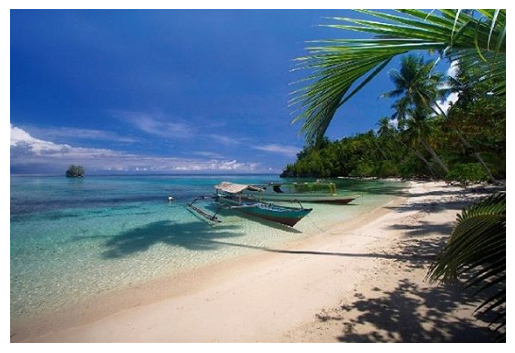

bersih


In [26]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=False, boxs=False)